# k-means 알고리즘으로 붓꽃 품종 구분하기

In [290]:
from sklearn.datasets import load_iris
iris = load_iris()

In [291]:
import pandas as pd

In [292]:
from sklearn.cluster import KMeans

iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                                'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [293]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [294]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [295]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [296]:
# 응집도(가까운 애들끼리 얼마나 뭉쳐있는지), 분리도(군집간 얼마나 분리가 되어있는지)를 통해 클러스터링 결과를 평가
# 실루엣 계수(-1~1) 군집 간의 거리 측정
# -값은 아예 다른 군집/ 0에 가까울수록 근처 군집과 가까움
# 1에 가까울수록 근청 군집과 멀리 떨어져있어서 좋음(잘뭉쳐져있음)
# 실루엣 계수 -> 클러스터 개수 결정

# silhouette 계수 측정

In [297]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster']) # 각 데이터 포인트별 실루엣 계수 계산
iris_df['silhouette_coeff']=score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [298]:
silhouette_score(iris.data, iris_df['cluster']) # 실루엣 계수

np.float64(0.5511916046195919)

# 실루엣 차트

In [299]:
import matplotlib.pyplot as plt

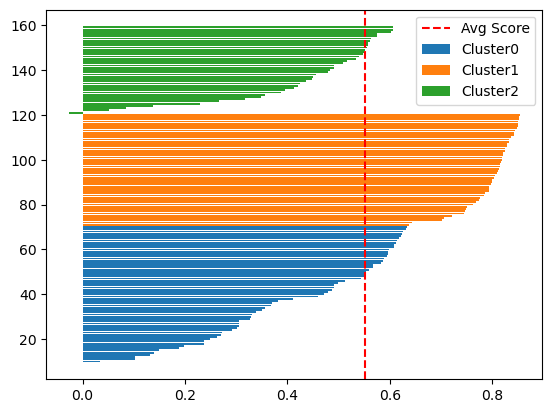

In [300]:
y_lower = 10 # 바운더리 설정
for i in range(3):
    cluster_i = score_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper
    
avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

In [301]:
# SSE 오차제곱합
# 엘보우:완만해지는 부분 , 완만해진다 -> 클러스터를 늘려도 크게 차이가 없다.


# scree plot

In [302]:
KM.inertia_

78.85566582597728

In [303]:
scree_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

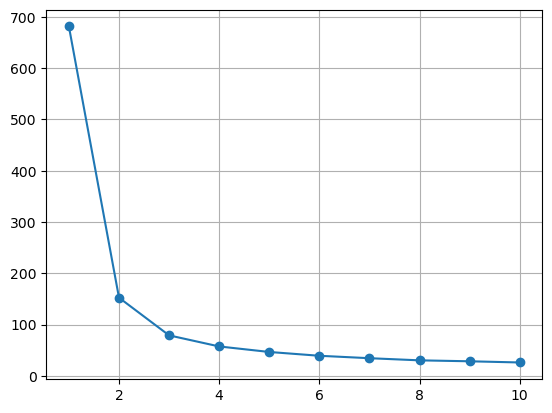

In [304]:
inertia = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

In [305]:
# 차원 축소: 차원을 축소하면서 거리를 가깝게 만들어줌
# 주성분 분석: 상관성이 높은 애들을 먼저 하나의 차원으로 뽑아냄
# 데이터의 분산을 최대로 유지하는 축들 -> 주성분
# 단위가 다른 변수인 경우 정규화 후 차원 축소 진행해야함

# PCA > 2개의 주성분으로 축소

In [306]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2차원으로 축소
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape # 2개의 열로 축소됨

(150, 2)

In [307]:
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


## PCA 결과 시각화

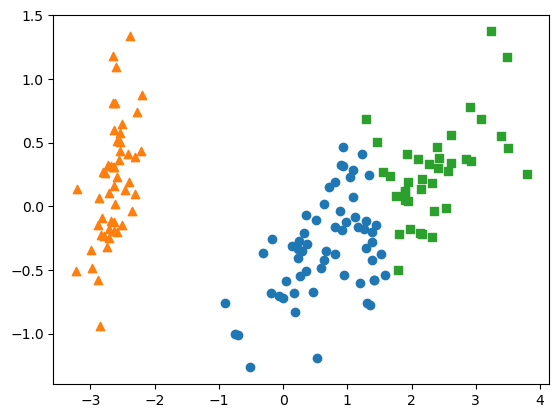

In [308]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='^')

plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='s')

plt.show()

In [309]:
pca.explained_variance_ratio_ # 첫번째 주성분, 두번째 주성분 설명력 확인

array([0.92461872, 0.05306648])

# StandardScaler 로 스케일링
# PCA 2개로 축소
# 시각화

In [310]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:4])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [311]:
from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-2.389842,0.646835


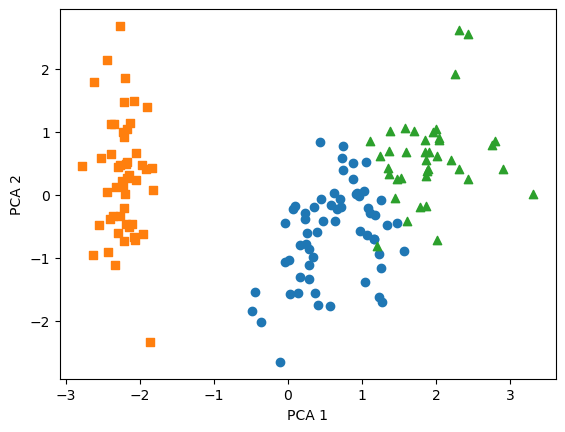

In [312]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [313]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [314]:
pca_scaled.explained_variance_ratio_

array([0.72962445, 0.22850762])

# 클러스터링 실습

In [315]:
# pca 2개의 주성분, ... 그 이상 주성분 추출
# explained_variance_ratio_이 가장 높은 주성분의 갯수
# kmeans data=pca1, pca2, cluster=2

In [316]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [317]:
# 데이터 불러오기
X = cancer.data
y = cancer.target

df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

In [318]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [319]:
df.groupby(['target', 'cluster']).size()

target  cluster
0       0          130
        1           82
1       0            1
        1          356
dtype: int64

In [320]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]


In [321]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 각 데이터의 실루엣 계수 계산
silhouette_vals = silhouette_samples(X, df['cluster'])
df['silhouette'] = silhouette_vals

# 전체 평균 실루엣 점수
avg_score = silhouette_score(X, df['cluster'])
print("평균 실루엣 점수:", avg_score)


평균 실루엣 점수: 0.6972646156059464


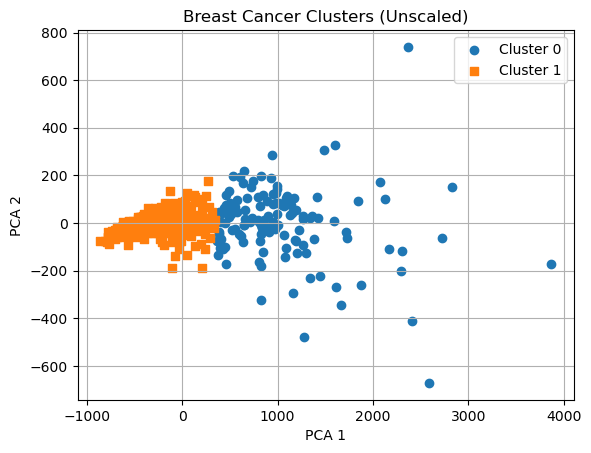

In [322]:
import matplotlib.pyplot as plt

# 클러스터 0
plt.scatter(df[df['cluster'] == 0]['pca_x'],
            df[df['cluster'] == 0]['pca_y'],
            marker='o', label='Cluster 0')

# 클러스터 1
plt.scatter(df[df['cluster'] == 1]['pca_x'],
            df[df['cluster'] == 1]['pca_y'],
            marker='s', label='Cluster 1')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Breast Cancer Clusters (Unscaled)')
plt.legend()
plt.grid(True)
plt.show()


In [323]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.98204467 0.01617649]
0.9982211613741725


In [324]:
# 스케일링 적용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [325]:
from sklearn.cluster import KMeans

kmeans_scaled = KMeans(n_clusters=2, random_state=42)
kmeans_scaled.fit(X_scaled)

df['cluster_scaled'] = kmeans_scaled.labels_

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [326]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals_scaled = silhouette_samples(X_scaled, df['cluster_scaled'])
df['silhouette_scaled'] = silhouette_vals_scaled

avg_score_scaled = silhouette_score(X_scaled, df['cluster_scaled'])
print("스케일링 한 평균 실루엣 점수:", avg_score_scaled)


스케일링 한 평균 실루엣 점수: 0.3447344346611054


In [327]:
from sklearn.decomposition import PCA

pca_scaled = PCA(n_components=2)
pca_transformed_scaled = pca_scaled.fit_transform(X_scaled)

df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
df['pca_scaled_y'] = pca_transformed_scaled[:, 1]


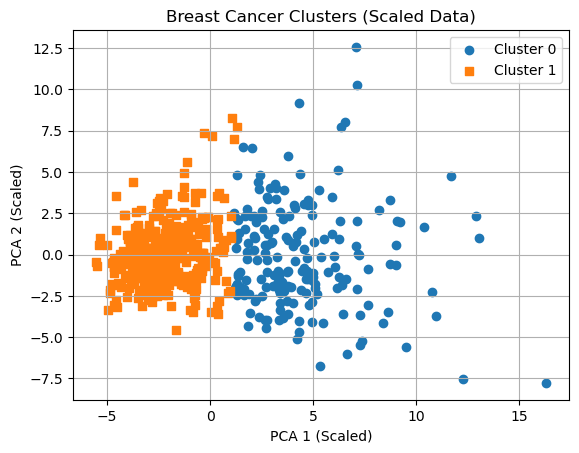

In [328]:
import matplotlib.pyplot as plt

plt.scatter(df[df['cluster_scaled'] == 0]['pca_scaled_x'],
            df[df['cluster_scaled'] == 0]['pca_scaled_y'],
            marker='o', label='Cluster 0')

plt.scatter(df[df['cluster_scaled'] == 1]['pca_scaled_x'],
            df[df['cluster_scaled'] == 1]['pca_scaled_y'],
            marker='s', label='Cluster 1')

plt.xlabel('PCA 1 (Scaled)')
plt.ylabel('PCA 2 (Scaled)')
plt.title('Breast Cancer Clusters (Scaled Data)')
plt.legend()
plt.grid(True)
plt.show()


In [329]:
print("PCA 설명된 분산 비율:", pca_scaled.explained_variance_ratio_)
print("설명된 분산 비율 합:", sum(pca_scaled.explained_variance_ratio_))

PCA 설명된 분산 비율: [0.44272026 0.18971182]
설명된 분산 비율 합: 0.6324320765155943
